In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from tools import *

In [2]:
diagname = 'teleconnections'
machine = 'wilma'
telecname = 'NAO'

config = load_config(machine)

In [3]:
infile_path = config[diagname][telecname]['input']

In [4]:
infile = xr.open_dataset(infile_path)

In [5]:
infile['msl'].dims[-1]

'lon'

In [6]:
test = infile['msl'].mean(dim='lat')

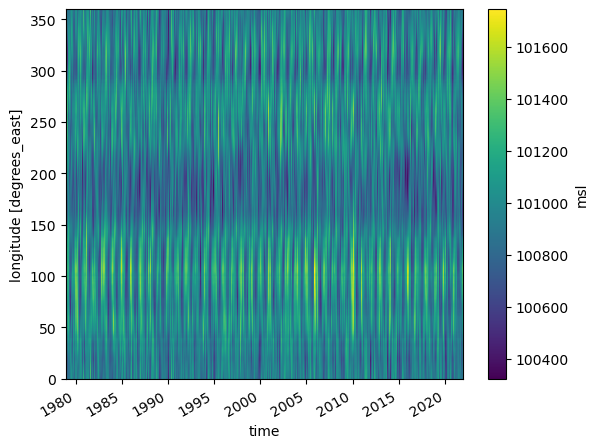

In [19]:
fig, ax = plt.subplots()

test.plot(ax=ax,x='time',y='lon')

In [16]:
def hovmoller_plot(infile,dimmean='lat',outputdir=None):
    '''
    infile is a DataArray
    '''
    infile_mean = infile.mean(dim=dimmean)

    fig, ax = plt.subplots()
    #im = ax.pcolormesh(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], infile_mean.T)
    im = ax.contourf(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], infile_mean.T)
    plt.colorbar(im, ax=ax)
    ax.set_xlabel('time')
    ax.set_ylabel(infile_mean.dims[-1])
    ax.set_title(f'Hovmoller Plot ({dimmean} mean)')
    return fig, ax

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Hovmoller Plot (lat mean)'}, xlabel='time', ylabel='lon'>)

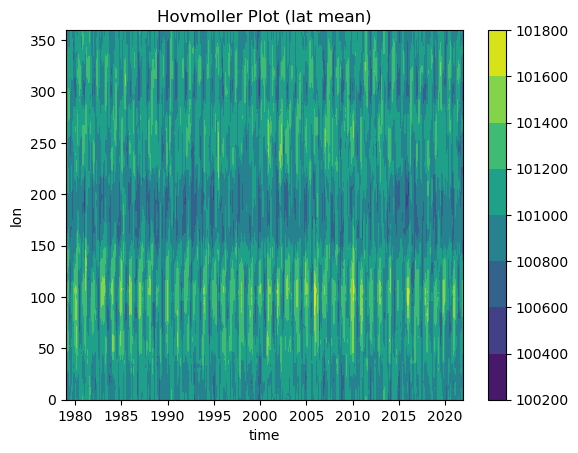

In [17]:
hovmoller_plot(infile['msl'],dimmean='lat')